<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 사전 작업

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Yolov8 사용해서 Object Detection(객체 탐지) 하기
- 공식문서 : https://docs.ultralytics.com/

In [1]:
# Gpu 상태 확인하기
!nvidia-smi

Thu Nov 16 01:49:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Yolov8 install

In [ ]:
!pip install ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image    # 창에 보여주기

### 커맨드 창에서 실행

In [5]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True
#          작업유형 / 모드         / 모델 / .yaml파일에서 로드 / 데이터 경로                                             /

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 105.5ms
Speed: 2.0ms preprocess, 105.5ms inference, 80.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


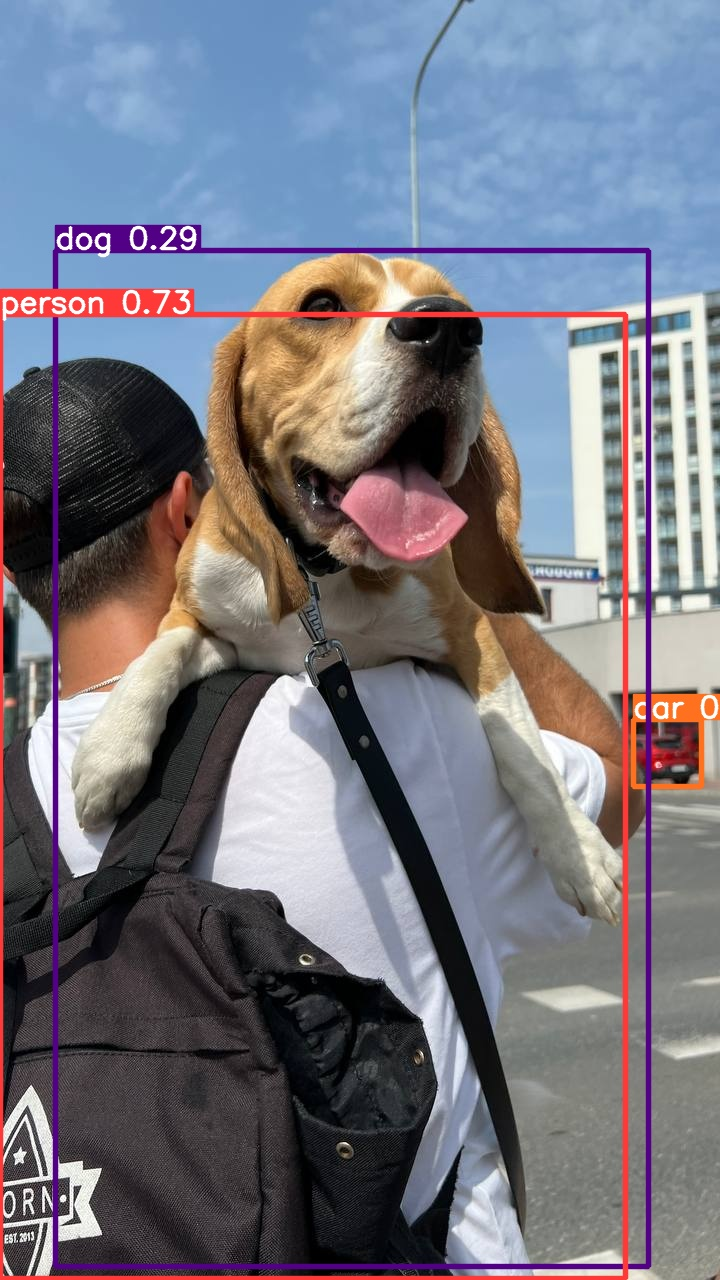

In [6]:
# 위에서 받은 이미지를 yolov8n 모델로 객체 탐지한 결과
Image(filename='/content/runs/detect/predict/dog.jpeg', height=500)

In [7]:
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True
#          작업유형 / 모드         / 모델 / .yaml파일에서 로드 / 데이터 경로                                             /

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 256.3ms
Speed: 12.2ms preprocess, 256.3ms inference, 378.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


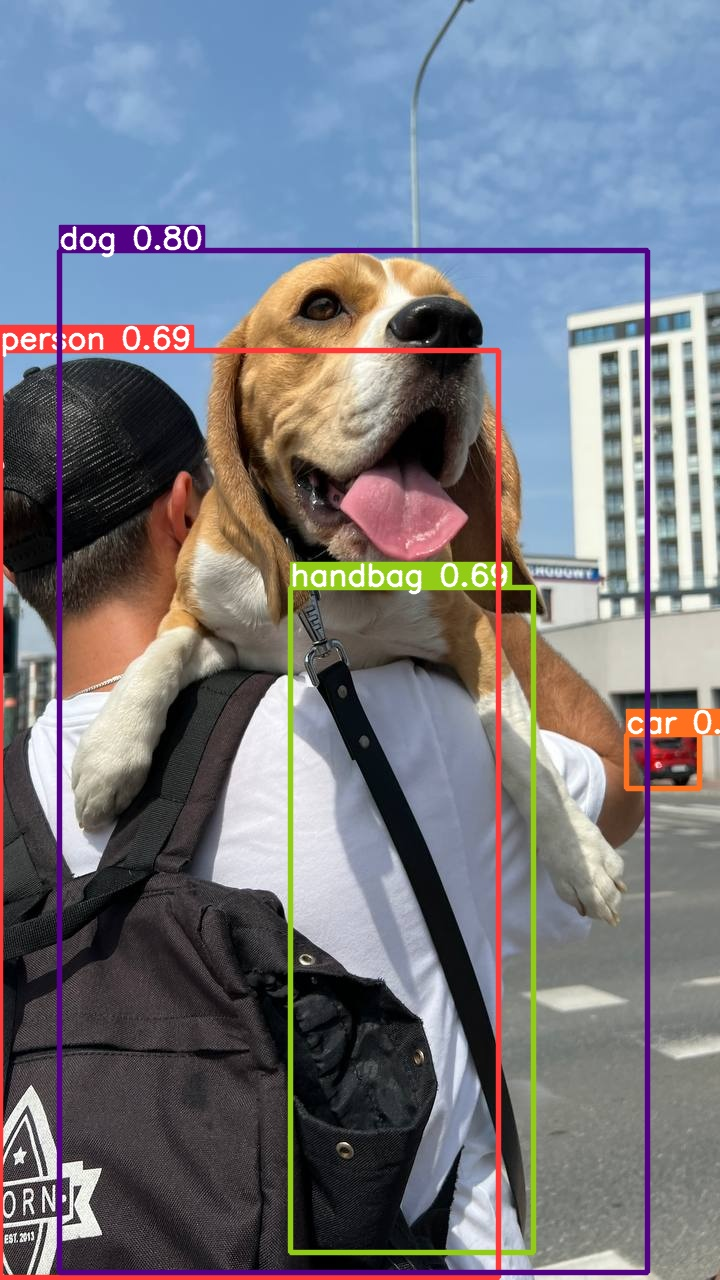

In [8]:
# 위에서 받은 이미지를 yolov8s 모델로 객체 탐지한 결과
Image(filename='/content/runs/detect/predict2/dog.jpeg', height=500)

위 결과를 확인하면 yolov8 모델에 따라 객체 탐지율, 객체 들이 달라진다.

### 파이썬 코드로 yolov8 모델 사용
- 다운받은 모델을 사용해서 파이썬 코드로 예측하기

In [9]:
pt_path = '/content/yolov8n.pt'
img_path = '/content/dog.jpeg'
yolo = YOLO(pt_path)      # 모델 선언
result = yolo.predict(img_path, conf=0.25)


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 106.5ms
Speed: 2.0ms preprocess, 106.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0., 16.,  2.], device='cuda:0')
conf: tensor([0.7271, 0.2907, 0.2846], device='cuda:0')
data: tensor([[0.0000e+00, 3.1447e+02, 6.2508e+02, 1.2782e+03, 7.2713e-01, 0.0000e+00],
        [5.5173e+01, 2.5002e+02, 6.4811e+02, 1.2663e+03, 2.9066e-01, 1.6000e+01],
        [6.3323e+02, 7.1954e+02, 7.0105e+02, 7.8603e+02, 2.8456e-01, 2.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1280, 720)
shape: torch.Size([3, 6])
xywh: tensor([[ 312.5377,  796.3332,  625.0754,  963.7230],
        [ 351.6406,  758.1470,  592.9349, 1016.2500],
        [ 667.1415,  752.7864,   67.8247,   66.4945]], device='cuda:0')
xywhn: tensor([[0.4341, 0.6221, 0.8682, 0.7529],
        [0.4884, 0.5923, 0.8235, 0.7939],
        [0.9266, 0.5881, 0.0942, 0.0519]], device='cuda:0')
xyxy: tensor([[   0.0000,  314.4717,  625.0754, 1278.1947],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  7

In [11]:
# 객체 박스 좌표
result[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1947],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [12]:
# 객체 탐지율
result[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [13]:
# 라벨링 클래스
result[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [14]:
# 라벨링 클래스명
result[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

### Roboflow 사용해서 커스텀 이미지 라벨 데이터 사용하기

#### 데이터셋 준비

In [16]:
!pip install roboflow --quiet

In [ ]:
!mkdir './datasets'

!curl -L "https://public.roboflow.com/ds/4Nbn3Nc230?key=28HuKn4xSb" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

#### 라벨링 한것 yolov8 적용

In [18]:
data_file = './data.yaml'

!yolo task=detect mode=train model=yolo8m.pt data={data_file} epochs=25 imgsz=800 plots=True batch=15

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 94, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 146, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened

In [19]:
# 모델 다운받기
yolo = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 302MB/s]


In [20]:
# 모델 훈련시키기
yolo.train(data='./data.yaml', epochs=25, batch=15)

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=./data.yaml, epochs=25, patience=50, batch=15, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7b2a382920>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

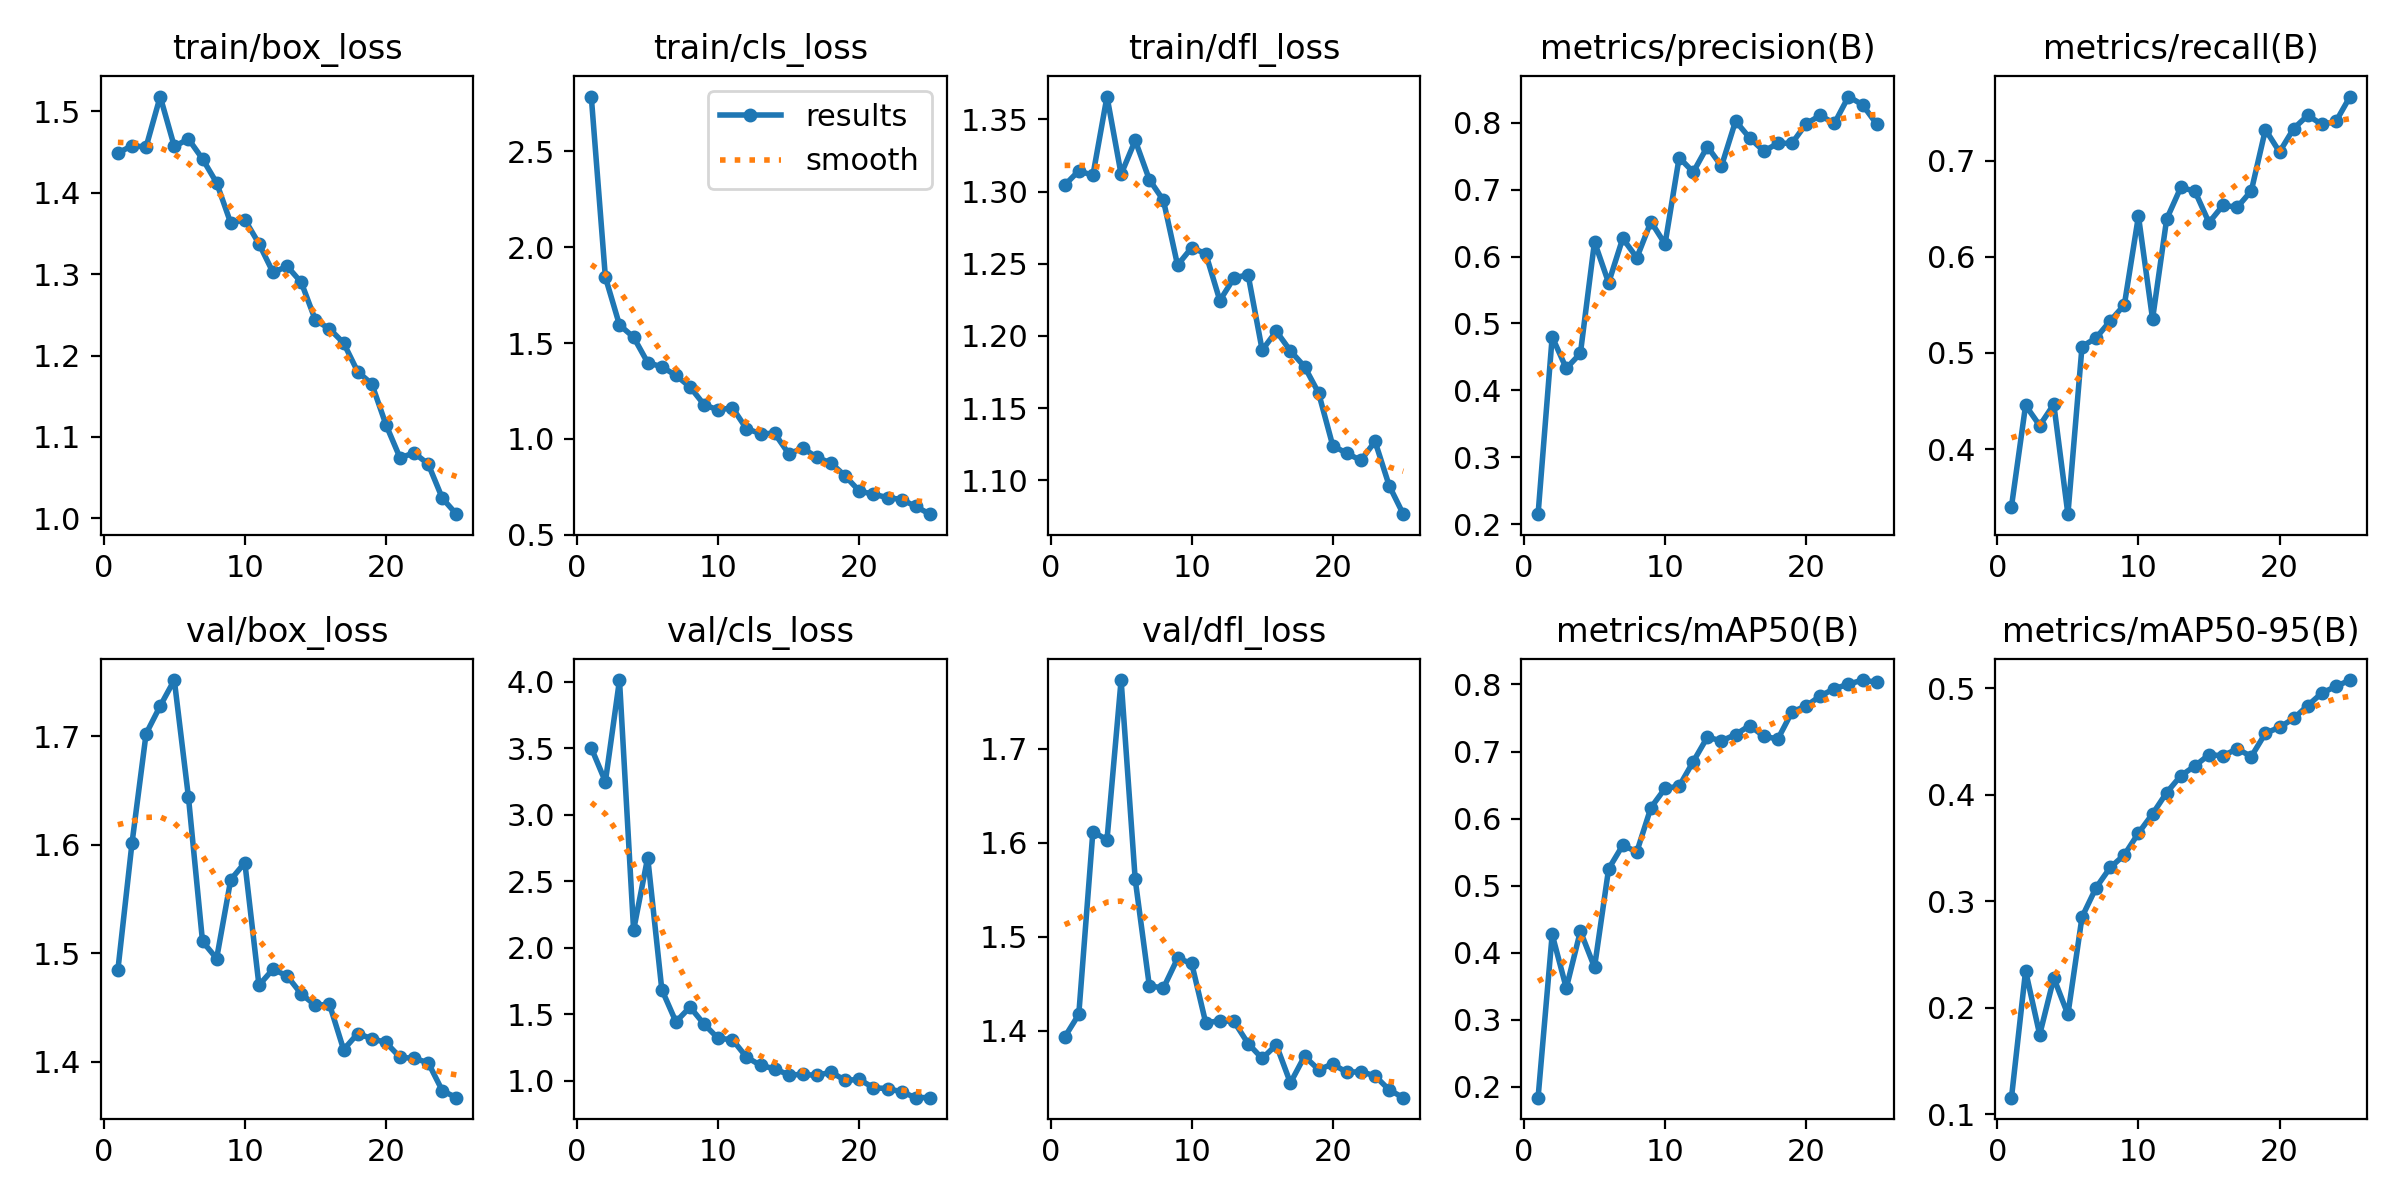

In [42]:
# 모델 결과
Image(filename='/content/runs/detect/train/results.png', height=500)

위 결과를 확인하면 박스에 해당하는 로스값을 통해서 내가 라벨링에 대한 정보가 적다 or 잘못 박스화를 진행했다 라는 결과가 나온다.
<br>map -> 수치가 높게 나온다고 하면 숫자로는 좋은 결과를 나온다.
<br>하지만 실제 이미지를 통해서 확인을 하면 안되는 경우가 나오기때문에 너무 숫자에 의존한 결과를 내면 안된다.

In [21]:
# 모델 검증하기
yolo.val()

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]
                   all        127        909      0.796      0.776      0.803      0.506
                  fish        127        459      0.772      0.804      0.839      0.499
             jellyfish        127        155      0.858      0.935      0.961      0.565
               penguin        127        104      0.656      0.789      0.716       0.37
                puffin        127         74      0.624      0.605      0.646      0.318
                 shark        127         57      0.829      0.679       0.74      0.497
              starfish        127   

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7b66dc2b30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [28]:
# 모델 예측하기
from ultralytics import YOLO
from PIL import Image
import cv2

result = yolo.predict(source='/content/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg', show=False, save=True)


image 1/1 /content/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 24 penguins, 28.5ms
Speed: 4.4ms preprocess, 28.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train5


In [29]:
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}
orig_img: array([[[168, 113,  98],
        [168, 113,  98],
        [169, 114,  99],
        ...,
        [226, 174, 168],
        [225, 173, 167],
        [224, 172, 166]],

       [[167, 112,  97],
        [167, 112,  97],
        [167, 112,  97],
        ...,
        [227, 175, 169],
        [226, 174, 168],
        [225, 173, 167]],

       [[167, 112,  97],
        [166, 111,  96],
        [165, 110,  95],
        ...,
        [228, 176, 169],
        [227, 175, 168],
        [227, 175, 168]],

       ...,

       [[ 26,  33,  28],
        [ 29,  36,  31],
        [ 31,  38,  33],
        ...,
        [ 98, 108,  91],
        [ 95, 105,  88],
        [ 91, 101,  84]],

       [[ 26,  33,  28],
        [ 31,  38,  33],
        [ 32,  39,  34],
   

In [34]:
result[0].names

{0: 'fish',
 1: 'jellyfish',
 2: 'penguin',
 3: 'puffin',
 4: 'shark',
 5: 'starfish',
 6: 'stingray'}

In [30]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.], device='cuda:0')
conf: tensor([0.9185, 0.7974, 0.7925, 0.7579, 0.7092, 0.6771, 0.6753, 0.6739, 0.6635, 0.6582, 0.6056, 0.5928, 0.5593, 0.5091, 0.4834, 0.4742, 0.4644, 0.3672, 0.3095, 0.3060, 0.3049, 0.3031, 0.2879, 0.2544], device='cuda:0')
data: tensor([[2.0666e+02, 5.3786e+02, 2.7354e+02, 6.6010e+02, 9.1853e-01, 2.0000e+00],
        [5.5034e+02, 5.0307e+02, 5.8407e+02, 5.6289e+02, 7.9739e-01, 2.0000e+00],
        [4.1061e+02, 4.6863e+02, 4.4623e+02, 5.2242e+02, 7.9254e-01, 2.0000e+00],
        [5.3434e+02, 4.7366e+02, 5.5469e+02, 5.0207e+02, 7.5791e-01, 2.0000e+00],
        [6.0323e+02, 4.8866e+02, 6.4308e+02, 5.5462e+02, 7.0916e-01, 2.0000e+00],
        [5.6614e+02, 4.7610e+02, 5.8607e+02, 5.0092e+02, 6.7711e-01, 2.0000e+00],
        [1.8194e+02, 4.7024e+02, 2.0666e+02, 5.1671e+02, 6.7531e-01, 2.0000e+00],
        [3.

In [31]:
result[0].boxes.cls

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.], device='cuda:0')

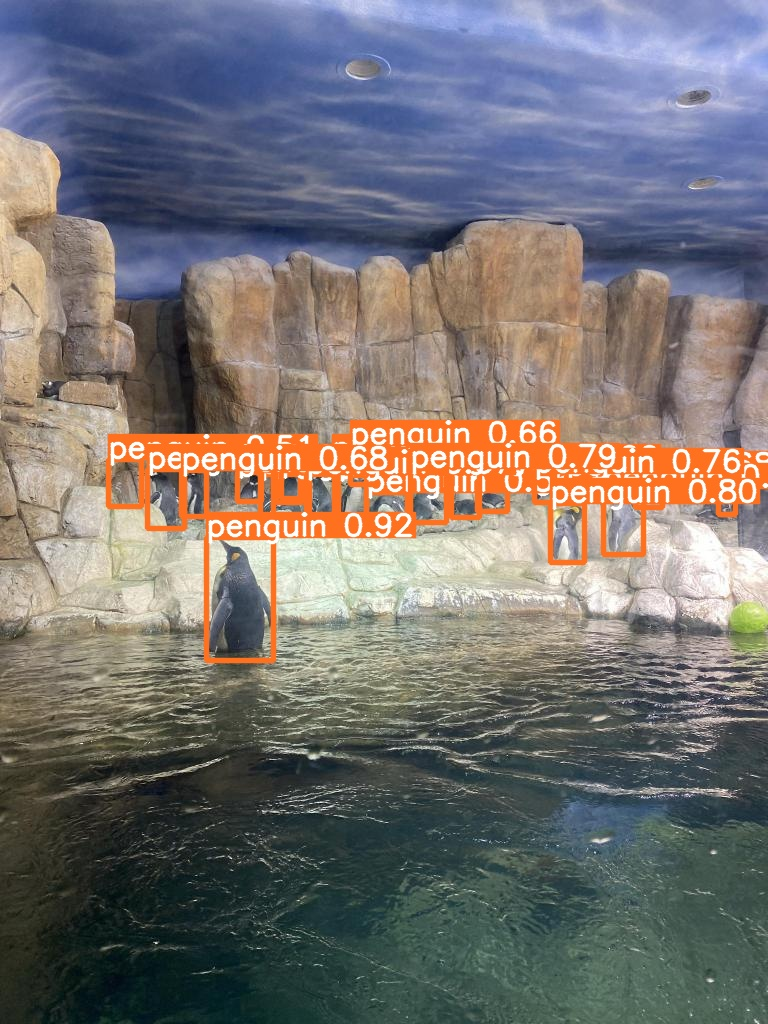

In [41]:
# 위에서 예측한 이미지 확인
from IPython.display import display, Image
Image(filename='/content/runs/detect/train5/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg', height=500)